In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', 100)

# Exploratory Analyis on Public Perception of Police

Survey questions regarding sentiment towards police over several months

In [ ]:
# load data

In [11]:
df = pd.read_csv("..//data//PAS Data Drive July 2020.csv", low_memory=False)

In [12]:
df.head(1)

,MONTH,ward,ward_n,ward_unique,Quarter1.1,C2,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,XQ3B,Q13,Q15,NQ21,Q21,NNQ27E,Q37,Q39A_2,NQ43,NQ44A,NQ46A,NQ47A,Q58,Q59,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,Q79A,...,A120,A121,XQ122,XQ128A,XQ128B,XQ128C,XQ128D,Q131,SQ132A_2,NQ133,NQ133A,Q133,NQ135BD,NQ135BE,NQ135BF,NQ135BH,WT_Q53,WT_Q53_B,WT_Q53_E,WT_Q54,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Q57,WT_Q57_B,WT_Q57_E,WT_Q58,WT_Q58_B,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,ReEthnicity6,ReEthnicityWhiteBAME,ReUKBorn,ReAge,ReDisability,ReGender,LGB,DetailEthnicity
0,159,E05000027,Alibon,Alibon - Barking and Dagenham,53,1,5,2,2,2,2,4,1,2,2,1,2,2,2,1,3,3,3,3,3,3,3,5,3,4,3,3,3,1,1,2,3,2,2,1,1,2,1,1,99,99,2,4,1,4,...,1,1,2,99,99,99,99,3,2,2,2,2,1,99,99,2,1.1434535500000000,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,,,,,,,,,,,,1.143454,1.141314,1.00,1.00,1.00,1.00,1.00,1.00,2.0,1.00


#### Main Question about Police in local area:

Q60 (ASK ALL) Taking everything into account, how good a job do you think the police IN THIS AREA are doing? Read out options except don’t know and refused If necessary: By 'this area' I mean within 15 minutes' walk from here 

#1. Excellent 
#2. Good 
#3. Fair 
#4. Poor 
#5. Very poor 
#97. Don’t know 
#98. Refused

In [56]:
df['Q61'].unique()

array([ 3,  2,  4,  1,  5, 97, 98])

Interesting to see 97,98... could create separate analysis for when the participant refused or didn't know their response.

In [116]:
# Let's focus on a few questions that were asked, filtered below:

In [13]:
cols = df.loc[:,'Q60':'NQ135BF'].columns

In [14]:
# Count of other values

In [16]:
def percentUnknown(column):
    """
    input: column variable
    output: text of proportion for that column variable
    Calculates proportion of each response that isn't on same likert scale 
    """
    print(f'For variable: {column}')
    print(f'{round(df[df[column] == 97].shape[0]/df.shape[0],4)} % of all responses answered Don’t know')
    print(f'{round(df[df[column] == 98].shape[0]/df.shape[0],4)} % of all responses refused to answer')
    print(f'{round(df[df[column] == 99].shape[0]/df.shape[0],4)} % answered with 99')
    print('')

In [17]:
percentUnknown('SQ79EA')

For variable: SQ79EA
0.0008 % of all responses answered Don’t know
0.0001 % of all responses refused to answer
0.5088 % answered with 99



In [119]:
# loop through all columns that we want to explore
#[print(percentUnknown(i)) for i in cols]

In [13]:
df.shape

(25178, 120)

In [14]:
# 99 - means the participant wasn't asked this question, should likely drop for our analysis
df[df['SQ79EA'] == 99].shape

(12811, 120)

In [ ]:
# filter out if not on likert scale

In [18]:
df_likert = df.copy()

In [19]:
df_likert[cols] = df_likert[df_likert[cols] < 96][cols]

In [20]:
df_likert.head()

,MONTH,ward,ward_n,ward_unique,Quarter1.1,C2,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,XQ3B,Q13,Q15,NQ21,Q21,NNQ27E,Q37,Q39A_2,NQ43,NQ44A,NQ46A,NQ47A,Q58,Q59,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,Q79A,...,A120,A121,XQ122,XQ128A,XQ128B,XQ128C,XQ128D,Q131,SQ132A_2,NQ133,NQ133A,Q133,NQ135BD,NQ135BE,NQ135BF,NQ135BH,WT_Q53,WT_Q53_B,WT_Q53_E,WT_Q54,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Q57,WT_Q57_B,WT_Q57_E,WT_Q58,WT_Q58_B,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,ReEthnicity6,ReEthnicityWhiteBAME,ReUKBorn,ReAge,ReDisability,ReGender,LGB,DetailEthnicity
0,159,E05000027,Alibon,Alibon - Barking and Dagenham,53,1,5,2,2,2,2,4,1,2,2,1,2,2,2,1,3,3,3,3,3,3,3,5,3,4,3.0,3.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,2.0,4.0,1.0,4.0,...,1.0,1.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,2,1.1434535500000000,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,,,,,,,,,,,,1.143454,1.141314,1.00,1.00,1.00,1.00,1.00,1.00,2.0,1.00
1,159,E05000027,Alibon,Alibon - Barking and Dagenham,53,1,8,3,5,3,3,5,3,4,3,2,1,2,2,3,2,4,3,3,3,3,3,5,1,2,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,NaN,NaN,2.0,3.0,1.0,6.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,3,0.3939396360000000,0.3936016760000000,0.3936016760000000,,0.3936016760000000,0.3936016760000000,,0.3936016760000000,0.3936016760000000,,0.3936016760000000,0.3936016760000000,,,,,,,,,,,,,0.393940,0.393202,1.00,1.00,1.00,3.00,2.00,1.00,2.0,1.00
2,157,E05000028,Becontree,Becontree - Barking and Dagenham,53,1,2,2,1,97,2,2,3,97,1,1,1,3,3,1,2,3,3,97,3,3,3,5,2,3,2.0,2.0,4.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,2.0,6.0,1.0,5.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,2,0.6558618210000000,0.6552991590000000,0.6552991590000000,,0.6552991590000000,0.6552991590000000,,0.6552991590000000,0.6552991590000000,,0.6552991590000000,0.6552991590000000,,,,,,,,,,,,,0.655862,0.654634,2.00,1.00,2.00,3.00,2.00,1.00,2.0,4.00
3,157,E05000028,Becontree,Becontree - Barking and Dagenham,53,1,2,4,2,2,4,2,4,4,2,1,1,2,3,1,1,3,3,97,3,3,3,5,3,3,1.0,2.0,2.0,2.0,NaN,4.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,1.0,NaN,NaN,2.0,6.0,1.0,7.0,...,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,2,0.9314671640000000,0.9306680600000000,0.9306680600000000,,0.9306680600000000,0.9306680600000000,,0.9306680600000000,0.9306680600000000,,0.9306680600000000,0.9306680600000000,,,,,,,,,,,,,0.931467,0.929724,2.00,1.00,2.00,1.00,2.00,2.00,2.0,4.00
4,157,E05000028,Becontree,Becontree - Barking and Dagenham,53,1,6,2,2,2,2,2,2,2,1,3,1,3,3,1,5,1,3,2,3,3,3,5,3,3,2.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,NaN,NaN,2.0,4.0,1.0,7.0,...,3.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,3,1.1805230610000000,1.1795102930000000,1.1795102930000000,,1.1795102930000000,1.1795102930000000,,1.1795102930000000,1.1795102930000000,,1.1795102930000000,1.1795102930000000,,,,,,,,,,,,,1.180523,1.178314,4.00,2.00,1.00,1.00,2.00,1.00,2.0,10.00


In [23]:
# group average score by different wards
df_likert.groupby(['MONTH','ward_n','ward'])[cols].mean().reset_index().head(1)

,MONTH,ward_n,ward,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,Q79A,Q79B,Q79C,Q79D,NQ79D,Q79E,Q79F,Q79G,Q79H,Q79I,Q79J,SQ79EA,SQ79EB,SQ79ED,SQ79EC,SQ79EE,SQ79EF,SQ79EG,SQ79EH,BQ90A,BQ90C,A120,A121,XQ122,XQ128A,XQ128B,XQ128C,XQ128D,Q131,SQ132A_2,NQ133,NQ133A,Q133,NQ135BD,NQ135BE,NQ135BF
0,157,Abbey Road,E05000630,2.0,2.0,2.333333,1.666667,1.666667,2.0,1.666667,1.666667,1.666667,2.0,1.333333,1.666667,1.0,1.0,NaN,NaN,2.0,3.666667,1.333333,5.333333,5.333333,5.0,5.333333,NaN,5.333333,5.666667,4.666667,4.666667,5.333333,5.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.666667,2.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN


In [147]:
# export to csv for joining with other data
"""df_likert.groupby(['MONTH','ward_n','ward'])[cols].mean().reset_index()\
.to_csv('../data/MeanbyMonthWard_OnlyLikert.csv',index=False)"""

In [33]:
# could look at time series
df['MONTH'].unique()

array([159, 157, 158, 160, 161, 162, 164, 165, 163, 168, 167, 166, 170,
       171, 169, 174, 173, 172, 176, 175, 177, 179, 178, 180])

# Correlation between PAS questionarie responses

## Section 1: Local Area and Community

In [ ]:
# let's remove any answer that is 99, as these indicate participant was not asked question

In [24]:
df.head(1)

,MONTH,ward,ward_n,ward_unique,Quarter1.1,C2,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,XQ3B,Q13,Q15,NQ21,Q21,NNQ27E,Q37,Q39A_2,NQ43,NQ44A,NQ46A,NQ47A,Q58,Q59,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,Q79A,...,A120,A121,XQ122,XQ128A,XQ128B,XQ128C,XQ128D,Q131,SQ132A_2,NQ133,NQ133A,Q133,NQ135BD,NQ135BE,NQ135BF,NQ135BH,WT_Q53,WT_Q53_B,WT_Q53_E,WT_Q54,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Q57,WT_Q57_B,WT_Q57_E,WT_Q58,WT_Q58_B,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,ReEthnicity6,ReEthnicityWhiteBAME,ReUKBorn,ReAge,ReDisability,ReGender,LGB,DetailEthnicity
0,159,E05000027,Alibon,Alibon - Barking and Dagenham,53,1,5,2,2,2,2,4,1,2,2,1,2,2,2,1,3,3,3,3,3,3,3,5,3,4,3,3,3,1,1,2,3,2,2,1,1,2,1,1,99,99,2,4,1,4,...,1,1,2,99,99,99,99,3,2,2,2,2,1,99,99,2,1.1434535500000000,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,,,,,,,,,,,,1.143454,1.141314,1.00,1.00,1.00,1.00,1.00,1.00,2.0,1.00


In [25]:
# filter to all columns that are survey questions we want to assess
cols = df.loc[:,'C2':'NQ135BH'].columns

In [26]:
df_filter = df.copy()

We keep 96 and 97, mostly because there is not a high proportion of these values and it might indicate a more negative opinion. Although these higher values would definitely skew the mean score.

In [27]:
df_filter[cols] = df_filter[df_filter[cols] != 99][cols]

In [28]:
df_filter.head(1)

,MONTH,ward,ward_n,ward_unique,Quarter1.1,C2,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,XQ3B,Q13,Q15,NQ21,Q21,NNQ27E,Q37,Q39A_2,NQ43,NQ44A,NQ46A,NQ47A,Q58,Q59,Q60,Q61,Q62A,Q62B,Q62C,Q62D,Q62E,Q62F,Q62TG,Q62H,Q62TI,Q62TJ,NQ62A,NQ62B,NQ62C,NQ62D,RQ80E,Q65,Q66,Q79A,...,A120,A121,XQ122,XQ128A,XQ128B,XQ128C,XQ128D,Q131,SQ132A_2,NQ133,NQ133A,Q133,NQ135BD,NQ135BE,NQ135BF,NQ135BH,WT_Q53,WT_Q53_B,WT_Q53_E,WT_Q54,WT_Q54_B,WT_Q54_E,WT_Q55,WT_Q55_B,WT_Q55_E,WT_Q56,WT_Q56_B,WT_Q56_E,WT_Q57,WT_Q57_B,WT_Q57_E,WT_Q58,WT_Q58_B,WT_Q58_E,WT_Q59,WT_Q59_B,WT_Q59_E,WT_Q60,WT_Q60_B,WT_Q60_E,WT_Discrete,WT_Discrete_rebased,ReEthnicity6,ReEthnicityWhiteBAME,ReUKBorn,ReAge,ReDisability,ReGender,LGB,DetailEthnicity
0,159,E05000027,Alibon,Alibon - Barking and Dagenham,53,1,5,2,2,2,2,4,1,2,2,1,2,2,2,1,3,3,3,3,3,3,3,5,3,4,3,3,3,1,1,2,3,2,2,1,1,2,1,1,NaN,NaN,2,4,1.0,4,...,1,1,2.0,NaN,NaN,NaN,NaN,3,2,2.0,2,2,1,NaN,NaN,2,1.1434535500000000,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,1.1424725830000000,1.1424725830000000,,,,,,,,,,,,,1.143454,1.141314,1.00,1.00,1.00,1.00,1.00,1.00,2.0,1.00


Some of the following are missing from the dataframe:

SQ79EA(ASK ALL)The Metropolitan Police use a wide range of tactics to help them fight crime. To what extent would you support or oppose the use of the following tactics in your area?Uniformed police patrols on the street 1. Strongly support2. Tend to support3. Neither support nor oppose 4. Tend to oppose5. Strongly oppose97. Don’t know 98. Refused 

SQ79EB(ASK ALL)School and community visits –for example, police attending school assemblies, events, or local meetings. 

SQ79ED(ASK ALL)Stop and Search –a power that means the police can search a person if they think they may be carrying something they shouldn’t be,such as drugs or weapons), or if they are in an area where the police think serious violence may occur.. 

SQ79EC(ASK ALL)Stop and Account –a power that means the police can stop a person to ask what they are doing if they think they may be involved incriminal activity. This is different to Stop and Search as the police do not actively search the person.

SQ79EE(ASK ALL)Weapons Sweeps –where the police search public areas for weapons that have been discarded or hidden.  

SQ79EF(ASK ALL)Hard Stops or Tactical Contact –where the police use their own vehicles to box-in or physically make contact with a vehicle suspected of carrying someone involved in criminal activity.  

SQ79EG(ASK ALL)High speed pursuits –where police can chase vehicles suspected of carrying someone involved in criminal activity.

SQ79EH(ASK ALL)Over the last year, do you think that the police use of such tactics in your local area has increased, decreased, or stayed the same?1. Increased2. Decreased3. Stayed thesame 97. Don’t know 98. Refused 

In [33]:
def searchforCol(search):
    """
    Function to search for column variable as we read through all survey questions asked
    """
    if search in cols:
        return 'Exists!'
    else:
        return 'Missing'
    

In [34]:
searchforCol('Q1')

'Exists!'

In [39]:
def highestWard(search):
    """
    Aggregates the dataframe by the column variable and sorts by highest to low
    """
    display(df_filter.groupby(['ward_n','ward'])[[search]].mean().sort_values(search, ascending=False).head(10))
    

In [40]:
def ColShow(col):
    """
    Combination of the above two functions, searches for column if it's there will sort and filter
    """
    if searchforCol(col) == 'Exists!':
        highestWard(col)
    else:
        print('Missing column')
    
    

In [41]:
# let's collect a few questions that might be interesting, look at correlation?

In [42]:
ColShow('Q1')

,,Q1
ward_n,ward,
Christchurch,E05000069,18.250000
Edgware,E05000050,11.200000
Emerson Park,E05000309,9.062500
Bromley Common and Keston,E05000108,8.628571
St Andrew's,E05000320,8.540541
Bedfont,E05000346,8.250000
Walpole,E05000192,8.166667
Streatham South,E05000431,8.166667
Sutton North,E05000565,8.105263


In [43]:
# we will want to aggregate a few columns to compare across variables
df_filter.groupby(['ward_n','ward'])[['Q1','NQ135BD','Q61']].mean().head()#.sort_values(search, ascending=False).head(10)

Q1   NQ135BD        Q61
ward_n     ward                                    
Abbey      E05000026  4.203704  2.000000   7.740741
           E05000455  4.509091  3.581818   4.036364
Abbey Road E05000630  3.800000  6.350000   4.775000
Abbey Wood E05000214  5.489796  2.020408   4.306122
Abingdon   E05009388  4.704545  1.545455  10.840909

In [44]:
# columns we might find interesting
['Q1','Q3C','XQ3A','Q37','NQ43','NQ46A','NQ47A','NQ21','Q21','Q58','Q59']

['Q1',
 'Q3C',
 'XQ3A',
 'Q37',
 'NQ43',
 'NQ46A',
 'NQ47A',
 'NQ21',
 'Q21',
 'Q58',
 'Q59']

## SECTION 1: LOCAL AREA AND COMMUNITY  

Q1 (ASK ALL) How long have you lived in this area? Clarify as necessary 1. Less than 12 months 2. 12 months but less than 2 years 3. 2 years but less than 3 years 4. 3 years but less than 5 years 5. 5 years but less than 10 years 6. 10 years but less than 20 years 7. 20 years but less than 30 years 8. 30 years or more 97. Don’t know 98. Refused 

Q3C (ASK ALL) To what extent do you agree or disagree with these statements? People in this neighbourhood can be trusted Read out options except don’t know and refused If necessary: By this neighbourhood I mean within 15 minutes’ walk from here 1. Strongly agree 2. Agree 3. Neither agree nor disagree 4. Disagree 5. Strongly disagree 97. Don’t know 98. Refused

## SECTION 2: FEAR OF CRIME AND LOCAL CRIME PROBLEMS

XQ3A (ASK ALL) How likely or unlikely would you be to do the following things? Call the police to report a crime occurring in your local area Read out options except don’t know and refused 1. Very likely 2. Fairly likely 3. Neither likely nor unlikely 4. Fairy unlikely 5. Very unlikely 97. Don’t know 98. Refused

Q37 (ASK ALL) To what extent do you think gun crime is a problem in this area, that is people using or carrying guns or replica guns? 

Read out options except don’t know and refused 1. Major problem 2. Minor problem 3. Not a problem at all 97. Don’t know 98. Refused

** NQ43 (ASK ALL) To what extent do you think gangs are a problem in this area? Read out options except don’t know and refused If necessary: By 'this area' I mean within 15 minutes' walk from here 1. Major problem 2. Minor problem 3. Not a problem at all 97. Don’t know 98. Refused 

NQ46A (ASK ALL) To what extent do you think people using mopeds or bicycles to commit crimes are a problem in this area? By this we mean people committing thefts, assaults or robberies using a moped or bicycle as a means of escape.Read out options except don’t know and refused If necessary: A moped is low-powered motorcycle which has a maximum speed of around 28mph. 1. Major problem 2. Minor problem 3. Not a problem at all 97. Don’t know 98. Refused

NQ47A (ASK ALL) To what extent do you agree or disagree that people using acid to commit or threaten physical assault is a problem in this area? Read out options except don’t know and refused 1.  Strongly agree 2.  Tend to agree 3.  Neither agree nor disagree4. Tend to disagree5. Strongly disagree 97. Don’t know 98. Refused 

NQ21 (ASK ALL) If you are walking alone in this area and you see a police officer on foot, bicycle or horseback, does it make you feel more safe, less safe or does it make no difference? If necessary: By 'this area' I mean within 15 minutes' walk from here 1. More safe 2. Less safe 3. It makes no difference97. Don’t know 98. Refused 

Q21 (ASK ALL) How safe do you feel walking alone in this area after dark? Read out options except spontaneous options, don’t know and refused If necessary: By 'this area' I mean within 15 minutes' walk from here 1. Very safe 2. Fairly safe 3. Fairly unsafe 4. Veryunsafe 5. (spontaneous) Do not go out at all 6. (spontaneous) Do not go out alone 97. Don’t know 98. Refused

## SECTION 3: TERRORISM

Q58 (ASK ALL) To what extent are you worried about a TERRORIST ATTACK in London? Read out options except don’t know and refused 1. Very worried 2. Fairly worried 3. Not very worried 4. Not at all worried 97. Don’t know 98. Refused 

Q59 (ASK ALL) And to what extent are you worried about a TERRORIST ATTACK particularly in this area? Read out options except don’t know and refused If necessary: By 'this area' I mean within 15 minutes' walk from here 1. Very worried 2. Fairly worried 3. Not very worried 4. Not at all worried 97. Don’t know 98. Refused 

## Section 4 Attitudes to Policing

Q60 (ASK ALL) Taking everything into account, how good a job do you think the police IN THIS AREA are doing? Read out options except don’t know and refused If necessary: By 'this area' I mean within 15 minutes' walk from here 1. Excellent 2. Good 3. Fair 4. Poor 5. Very poor 97. Don’t know 98. Refused 

Q61 (ASK ALL) Taking everything into account, how good a job do you think the police IN LONDON AS A WHOLE are doing? Read out options except don’t know and refused 1. Excellent 2. Good 3. Fair 4. Poor 5. Very poor97. Don’t know 98. Refused 

NQ135BD (ASK ALL) To what extent do you agree or disagree with this statement: The Metropolitan Police Service is an organisation that I can trust Read out options except don’t know and refused 1. Strongly agree 2. Tend to agree 3. Neither agree nor disagree 4. Tend to disagree 5. Strongly disagree 97. Don’t know 98. Refused 

NQ135BE(ASK ALL)It is important that the Metropolitan Police Service’s workforce reflects the population profile of the communities it serves 1. Strongly agree 2. Tend to agree 3. Neither agree nor disagree 4. Tend to disagree 5. Strongly disagree 97. Don’t know 98. Refused 

NQ135BF (ASK ALL)The police in your local area currently reflect the population profile of the local community? 1. Strongly agree 2. Tend to agree 3. Neither agree nor disagree 4. Tend to disagree 5. Strongly disagree 97. Don’t know 98. Refused 

Q79A (ASK ALL) Please use a scale of 1 to 7, where 1 = Not at all well and 7 = Very well And how well do you think the Metropolitan Police ... prevent terrorism? Showcard 5

1. 1 –Not at all well 2. 2 3. 3 4. 4 5. 5 6. 6 7. 7 –Very well 97. Don’t know 98. Refused 

In [45]:
# look at just attitude to policing, where higher is worse off

policing = list(set(['Q60','Q61','Q62B','NQ135BD','NQ135BE','NQ135BF','Q79A','Q79B','Q79C','Q79D','Q79E','Q79F']))

In [46]:
# list of other survey questions to compare against

other_survey = list(set(['Q1','Q3C','XQ3A','Q37','NQ43','NQ46A','NQ47A','NQ21','Q21','Q58','Q59','A120',
                         'A121','XQ128C']))

In [48]:
# filter dataframe to questions about policing
df_filter[policing].head(1)

,Q61,Q79C,Q79E,Q62B,Q79B,NQ135BD,Q60,Q79A,NQ135BE,NQ135BF,Q79D,Q79F
0,3,6,6,1,5,1,3,4,NaN,NaN,6,7


In [64]:
def ExploreSubset(col_list,title):
    """
    input: list of columns to explore the correlation between, title for heatmap that describes list
    output: summary statistics for this list of variables and heatmap with pearson correlation matrix
    """
    col_list = list(set(col_list)) # filter to columns of interest without any duplicates
    subset_df = df_filter.groupby(['ward_n','ward'])[col_list].mean().reset_index() # group by mean
    display(subset_df.describe()) # display summary statistics
    
    print(title) 
    pearsoncorr = subset_df.corr(method='pearson') # create correlation matrix
    fig, ax = plt.subplots(figsize=(15,10)) # visualize
    sb.heatmap(pearsoncorr, 
                xticklabels=pearsoncorr.columns,
                yticklabels=pearsoncorr.columns,
                linewidth=0.5,ax=ax)
    plt.show()
    

,Q61,Q79E,Q79C,Q62B,Q79B,NQ135BD,Q60,Q79A,NQ135BE,NQ135BF,Q79D,Q79F
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,632.000000,632.000000,693.000000,693.000000
mean,4.346155,16.234557,5.172878,2.572518,8.569469,2.128278,5.841915,8.119949,2.973574,14.256117,14.667033,9.633018
std,2.586216,8.466344,2.002660,1.758737,4.060036,0.886797,3.995294,3.476983,2.784719,10.085281,8.130121,4.410297
min,1.400000,2.500000,2.000000,1.000000,3.000000,1.000000,1.600000,4.000000,1.000000,1.421053,3.428571,3.000000
25%,2.448980,9.875000,3.944444,1.682927,5.333333,1.728814,2.540541,5.472222,1.547654,7.000000,8.260000,5.883721
50%,2.906250,15.290323,4.400000,1.833333,7.568182,1.880952,4.885714,7.444444,1.820856,12.738889,13.390244,8.475410
75%,5.516129,21.551020,6.191489,2.551724,10.514286,2.078431,7.711538,9.666667,2.478696,19.194853,19.162162,11.645161
max,21.500000,51.000000,22.200000,21.000000,42.000000,10.318182,27.578947,34.000000,20.095238,50.100000,53.138889,31.615385


Police Data


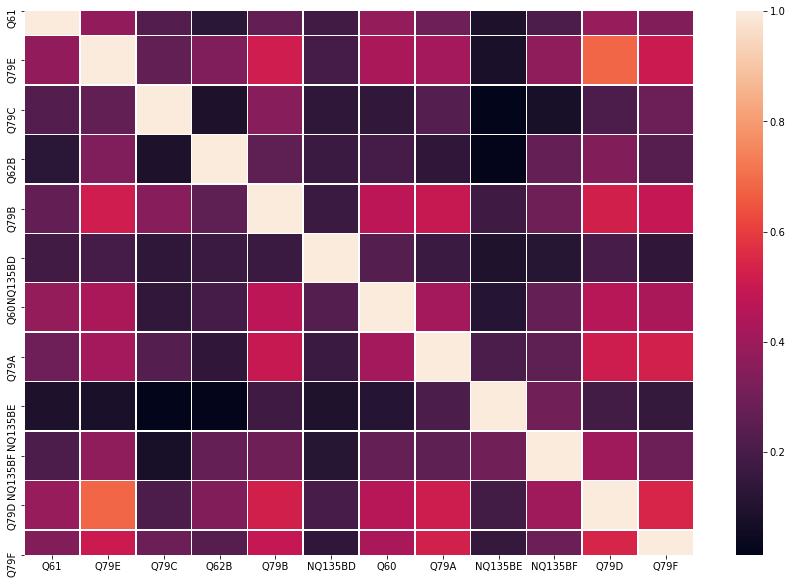

In [65]:
# input list of polcing column variables
ExploreSubset(policing,'Police Data')

Interesting to identify the columns that are more dark across all variables

In [66]:
police_compare = ['Q60','Q79B','Q79C','NQ135BD','Q79E','NQ135BE','NQ135BF']

Q60 (ASK ALL)
Taking everything into account, how good a job do you think the police IN THIS AREA are doing? 1. Excellent
2. Good
3. Fair
4. Poor
5. Very poor
97. Don’t know
98. Refused

Q79B Respond to emergencies promptly?
If necessary: Please think of London as a whole, rather than your local area in
Q79C (ASK ALL
...Provide a visible patrolling presence?

1. 1 – Not at all well
2. 2
3. 3
4. 4
5. 5
6. 6
7. 7 – Very well
97. Don’t know
98. Refused

NQ135BD (ASK ALL)
To what extent do you agree or disagree with these statements: The Metropolitan Police Service is an organisation that I can trust

Q79E (ASK ALL)
...Support victims and witnesses?

NQ135BE(ASK ALL)It is important that the Metropolitan Police Service’s workforce reflects the population profile of the communities it serves 1. Strongly agree 2. Tend to agree 3. Neither agree nor disagree 4. Tend to disagree 5. Strongly disagree 97. Don’t know 98. Refused 

NQ135BF (ASK ALL)The police in your local area currently reflect the population profile of the local community? 1. Strongly agree 2. Tend to agree 3. Neither agree nor disagree 4. Tend to disagree 5. Strongly disagree 97. Don’t know 98. Refused 

,XQ128C,NQ47A,NQ43,Q3C,XQ3A,NQ21,Q58,Q21,NQ46A,Q59,A120,Q1,Q37,A121
count,434.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,2.045710,7.228422,6.848326,3.096118,1.537774,1.534914,2.521148,2.460154,5.522816,3.348552,2.442395,5.301900,5.922249,14.379394
std,5.443004,3.683347,6.599416,1.949479,0.520464,0.778396,0.816936,0.617957,4.055766,0.847471,1.475487,0.952420,4.860931,8.935133
min,1.000000,3.071429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,4.636364,2.812500,2.065217,1.294118,1.222222,2.142857,2.135135,2.791667,2.976190,1.666667,4.826923,2.931818,7.903226
50%,1.000000,5.826087,4.902439,2.272727,1.423729,1.333333,2.352941,2.378378,3.000000,3.166667,1.896552,5.255814,3.000000,13.687500
75%,1.500000,8.846154,8.285714,3.666667,1.590909,1.480000,2.526316,2.615385,7.000000,3.375000,2.416667,5.703704,6.936170,19.272727
max,49.500000,27.375000,97.000000,21.600000,5.625000,7.060606,8.483871,7.526316,28.454545,13.105263,17.166667,18.250000,35.702703,97.000000


Section 1-3 Questions


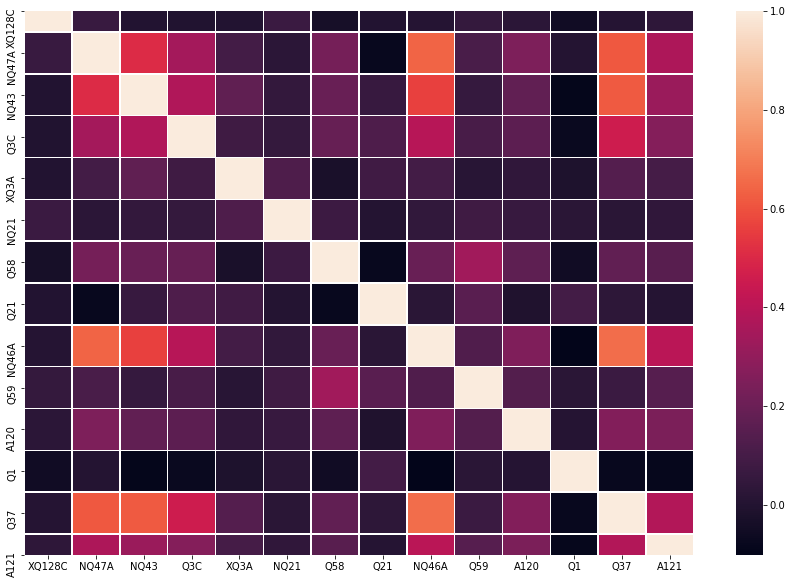

In [67]:
ExploreSubset(other_survey,'Section 1-3 Questions')

Q58 + Q59 very correlated

In [68]:
other_compare = ['Q1','Q37','Q21','NQ46A','NQ43','XQ128C']

To what extent do you think gun crime is a problem in this area, that is people using or carrying guns or replica guns?

In [69]:
df_filter['Q1'].value_counts()

6     4933
8     4871
5     3686
7     3086
1     2564
4     2524
3     1771
2     1718
98      18
97       7
Name: Q1, dtype: int64

In [70]:
df_filter['NQ135BE'].value_counts()

1.0     6037
2.0     4531
4.0      713
3.0      707
5.0      221
97.0     157
98.0       1
Name: NQ135BE, dtype: int64

,XQ128C,NQ43,Q79C,Q79E,Q79B,NQ135BD,Q60,NQ135BE,NQ135BF,NQ46A,Q1,Q37,Q21
count,434.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,632.000000,632.000000,693.000000,693.000000,693.000000,693.000000
mean,2.045710,6.848326,5.172878,16.234557,8.569469,2.128278,5.841915,2.973574,14.256117,5.522816,5.301900,5.922249,2.460154
std,5.443004,6.599416,2.002660,8.466344,4.060036,0.886797,3.995294,2.784719,10.085281,4.055766,0.952420,4.860931,0.617957
min,1.000000,1.000000,2.000000,2.500000,3.000000,1.000000,1.600000,1.000000,1.421053,1.500000,2.000000,1.000000,1.000000
25%,1.000000,2.812500,3.944444,9.875000,5.333333,1.728814,2.540541,1.547654,7.000000,2.791667,4.826923,2.931818,2.135135
50%,1.000000,4.902439,4.400000,15.290323,7.568182,1.880952,4.885714,1.820856,12.738889,3.000000,5.255814,3.000000,2.378378
75%,1.500000,8.285714,6.191489,21.551020,10.514286,2.078431,7.711538,2.478696,19.194853,7.000000,5.703704,6.936170,2.615385
max,49.500000,97.000000,22.200000,51.000000,42.000000,10.318182,27.578947,20.095238,50.100000,28.454545,18.250000,35.702703,7.526316


Police Sentiment vs. Additional Variables


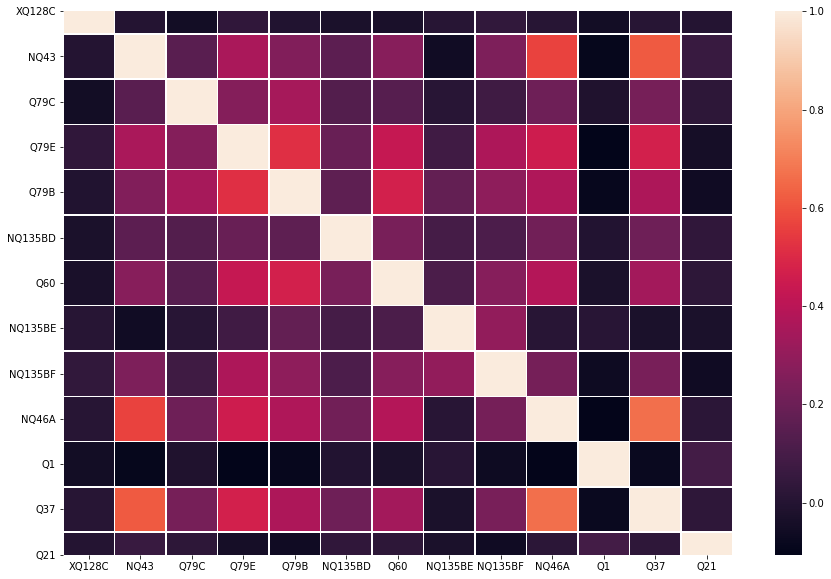

In [71]:
ExploreSubset(other_compare + police_compare,'Police Sentiment vs. Additional Variables')

Q21 (ASK ALL)
How safe do you feel walking alone in this area after dark? 1. Very safe
2. Fairly safe
3. Fairly unsafe
4. Very unsafe
5. (spontaneous) Do not go out at all
6. (spontaneous) Do not go out alone
97. Don’t know
98. Refused

NQ135BF (ASK ALL)
The police in your local area currently reflect the population profile of the local community?

XQ128C (ASK IF XQ128A = 1).
Treated you with respect. 

1. Yes
2. No
97. Don’t know 98. Refused

In [65]:
df_filter['XQ128C'].value_counts()

1.0     598
2.0     267
97.0      9
Name: XQ128C, dtype: int64

In [66]:
df_filter['Q21'].value_counts()

2     12009
1      5647
3      3537
4      1611
6      1202
5      1149
97       23
Name: Q21, dtype: int64

Q60 (ASK ALL)
Taking everything into account, how good a job do you think the police IN THIS AREA are doing? 
1. Excellent
2. Good
3. Fair
4. Poor
5. Very poor
97. Don’t know
98. Refused

In [73]:
police_df = df_filter.groupby(['ward_n','ward'])[policing].mean().reset_index()

In [74]:
police_df.head(1)

,ward_n,ward,Q61,Q79C,Q79E,Q62B,Q79B,NQ135BD,Q60,Q79A,NQ135BE,NQ135BF,Q79D,Q79F
0,Abbey,E05000026,7.740741,10.574074,31.777778,1.944444,18.333333,2.0,13.111111,18.351852,1.769231,1.961538,19.703704,23.611111


In [75]:
police_df.describe()

,Q61,Q79C,Q79E,Q62B,Q79B,NQ135BD,Q60,Q79A,NQ135BE,NQ135BF,Q79D,Q79F
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,632.000000,632.000000,693.000000,693.000000
mean,4.346155,5.172878,16.234557,2.572518,8.569469,2.128278,5.841915,8.119949,2.973574,14.256117,14.667033,9.633018
std,2.586216,2.002660,8.466344,1.758737,4.060036,0.886797,3.995294,3.476983,2.784719,10.085281,8.130121,4.410297
min,1.400000,2.000000,2.500000,1.000000,3.000000,1.000000,1.600000,4.000000,1.000000,1.421053,3.428571,3.000000
25%,2.448980,3.944444,9.875000,1.682927,5.333333,1.728814,2.540541,5.472222,1.547654,7.000000,8.260000,5.883721
50%,2.906250,4.400000,15.290323,1.833333,7.568182,1.880952,4.885714,7.444444,1.820856,12.738889,13.390244,8.475410
75%,5.516129,6.191489,21.551020,2.551724,10.514286,2.078431,7.711538,9.666667,2.478696,19.194853,19.162162,11.645161
max,21.500000,22.200000,51.000000,21.000000,42.000000,10.318182,27.578947,34.000000,20.095238,50.100000,53.138889,31.615385


In [76]:
pearsoncorr = police_df.corr(method='pearson')

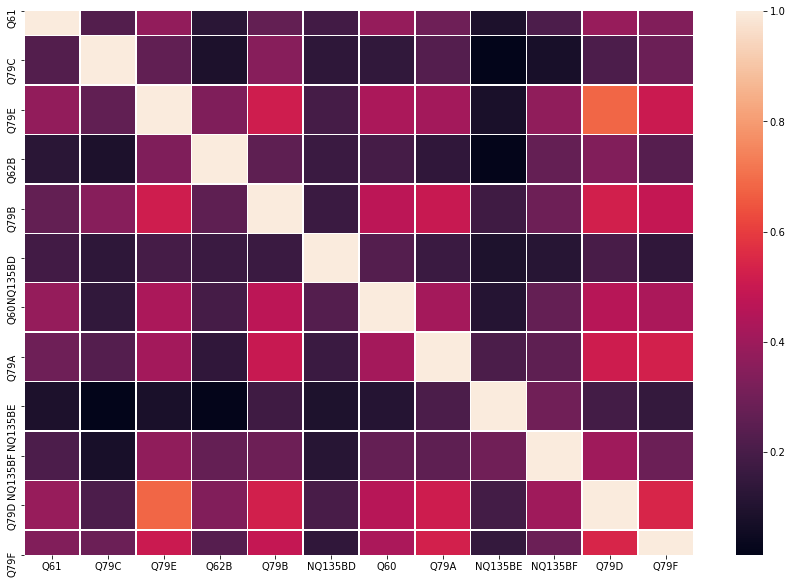

In [77]:


fig, ax = plt.subplots(figsize=(15,10)) 
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            linewidth=0.5,ax=ax)

In [78]:
police_df.corr(method='pearson')

,Q61,Q79C,Q79E,Q62B,Q79B,NQ135BD,Q60,Q79A,NQ135BE,NQ135BF,Q79D,Q79F
Q61,1.000000,0.229581,0.375439,0.125378,0.266294,0.184297,0.380446,0.293884,0.090052,0.211316,0.386890,0.335872
Q79C,0.229581,1.000000,0.263333,0.088468,0.350154,0.135620,0.144246,0.230484,0.014330,0.077988,0.214395,0.285244
Q79E,0.375439,0.263333,1.000000,0.333847,0.516546,0.192047,0.432137,0.411424,0.081098,0.368729,0.682827,0.505518
Q62B,0.125378,0.088468,0.333847,1.000000,0.255933,0.166262,0.192989,0.141369,0.020655,0.270464,0.335192,0.235567
Q79B,0.266294,0.350154,0.516546,0.255933,1.000000,0.164890,0.469775,0.496522,0.177643,0.290465,0.522865,0.487996
NQ135BD,0.184297,0.135620,0.192047,0.166262,0.164890,1.000000,0.232164,0.165300,0.094180,0.118042,0.202256,0.138543
Q60,0.380446,0.144246,0.432137,0.192989,0.469775,0.232164,1.000000,0.416418,0.110985,0.268983,0.460663,0.433066
Q79A,0.293884,0.230484,0.411424,0.141369,0.496522,0.165300,0.416418,1.000000,0.206938,0.255863,0.513749,0.527309
NQ135BE,0.090052,0.014330,0.081098,0.020655,0.177643,0.094180,0.110985,0.206938,1.000000,0.298863,0.188146,0.149109
NQ135BF,0.211316,0.077988,0.368729,0.270464,0.290465,0.118042,0.268983,0.255863,0.298863,1.000000,0.404696,0.284970


In [ ]:
# found interesting negative relationship between time living somewhere and other variables

In [ ]:
# can probably use Q61 as a proxy?

# remove? Q79D, NQ135BF a lot of people don't know

NQ135BF (ASK ALL)The police in your local area currently reflect the population profile of the local community?

Q79D (ASK ALL) ...Tackle gun crime? If necessary: Please think of London as a whole, rather than your local area in this instance

In [111]:
df['Q60'].corr(df['NQ135BF'])

0.05785100979093727

In [ ]:
df_filter['Q79D']

In [108]:
df_filter['Q79D'].value_counts()

5     7413
4     5800
6     3652
97    2874
7     1930
3     1883
2      981
1      638
98       7
Name: Q79D, dtype: int64

In [109]:
df_filter['NQ135BF'].value_counts()

2.0     4884
3.0     2396
1.0     1946
97.0    1575
4.0     1195
5.0      368
98.0       3
Name: NQ135BF, dtype: int64

In [86]:
ColShow('instanceQ79F')

,,Q79E
ward_n,ward,
Upper Norwood,E05000166,2.500
Brampton,E05000068,3.000
Norbury,E05000158,3.500
Woodside,E05000169,3.800
North End,E05000079,3.875
Upper Edmonton,E05000212,3.880
Thornton Heath,E05000165,4.000
Selhurst,E05000161,4.000
Broad Green,E05000149,4.000


In [76]:
ColShow('Q60')

,,Q60
ward_n,ward,
St Mary's,E05000081,1.60000
Colyers,E05000070,1.75000
Christchurch,E05000069,1.75000
Danson Park,E05000073,1.80000
Belmont,E05000557,1.90625
Cray Meadows,E05000072,2.00000
Addiscombe,E05000146,2.00000
Sidcup,E05000083,2.00000
Loxford,E05000507,2.00000
